In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
np.random.seed(1600)

In [3]:
N_EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
N_CLASSES = 10 # number of output classes
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

In [4]:
# Splitting of dataset between training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normaize the dataset
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, N_CLASSES)
Y_test = np_utils.to_categorical(y_test, N_CLASSES)

60000 train samples
10000 test samples


In [5]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape= (RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_CLASSES))
model.add(Activation('relu'))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from time import time
# early_stopper = 
# tensorboard = TensorBoard(write_images=True, write_graph=True)
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

callback = [tensorboard]
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT, callbacks=callback)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.1803 - acc: 0.9492 - val_loss: 0.1825 - val_acc: 0.9494
Epoch 2/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.1780 - acc: 0.9497 - val_loss: 0.1805 - val_acc: 0.9506
Epoch 3/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.1757 - acc: 0.9509 - val_loss: 0.1788 - val_acc: 0.9508
Epoch 4/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.1735 - acc: 0.9512 - val_loss: 0.1769 - val_acc: 0.9515
Epoch 5/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.1714 - acc: 0.9517 - val_loss: 0.1758 - val_acc: 0.9520
Epoch 6/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.1692 - acc: 0.9524 - val_loss: 0.1740 - val_acc: 0.9525
Epoch 7/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.1672 - acc: 0.9532 - val_loss: 0.1723 - val_acc

In [13]:

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 45us/step
Test score: 0.1536161282092333
Test accuracy: 0.9541


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


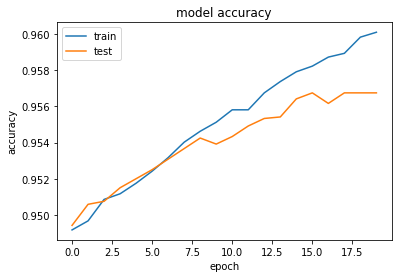

In [17]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss


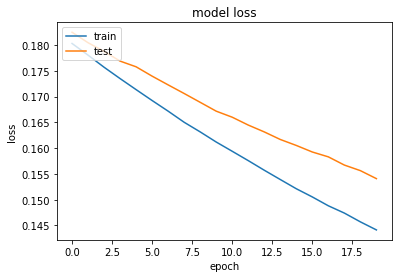

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()